# Trabajo integrador - Parte 2

# Aprendizaje Supervisado

**Nombre**:

## Problema de regresión

Para la creación de los datasets y la manipulación de los mismos vamos a trabajar directamente con dos módulos includios en la carpeta utils.

En esta podemos encontrar:
 - generate_data: Esta función wrappea el método de _make_regression_ de scikit learn para devolver un dataframe con un problema de regresión basado en sus parámetros.
 - generate_outliers: Esta función genera outliers livianos y pesados en función de los parámetros que le demos de entrada.

In [146]:
from utils.data_generation import generate_dataset
from utils.data_manipulation import generate_outliers
from utils.data_manipulation import data_split

### Ejemplo de uso

In [147]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [148]:
# Vamos a crear un dataset primero.

data = generate_dataset(
    n_samples=1000,
    n_features=5,
    n_informative=2,
    n_targets=1,
    noise=0,
    output='dataframe'
)

# esto nos genera un dataset que contiene 5 features, 2 de los cuales son informativos, y 1 target.

data.head()

,x0,x1,x2,x3,x4,target
0,1.615994,0.826029,2.762525,-1.553612,-0.506035,207.081188
1,-0.943025,1.229368,-0.220550,0.189516,0.633686,-3.222988
2,-1.454789,-0.621349,0.997266,-0.548088,-1.713643,-178.019672
3,-0.902263,-0.286268,0.166761,-0.070813,-0.614218,-103.597664
4,0.939313,-0.129061,0.209401,-0.560956,1.508940,78.499296


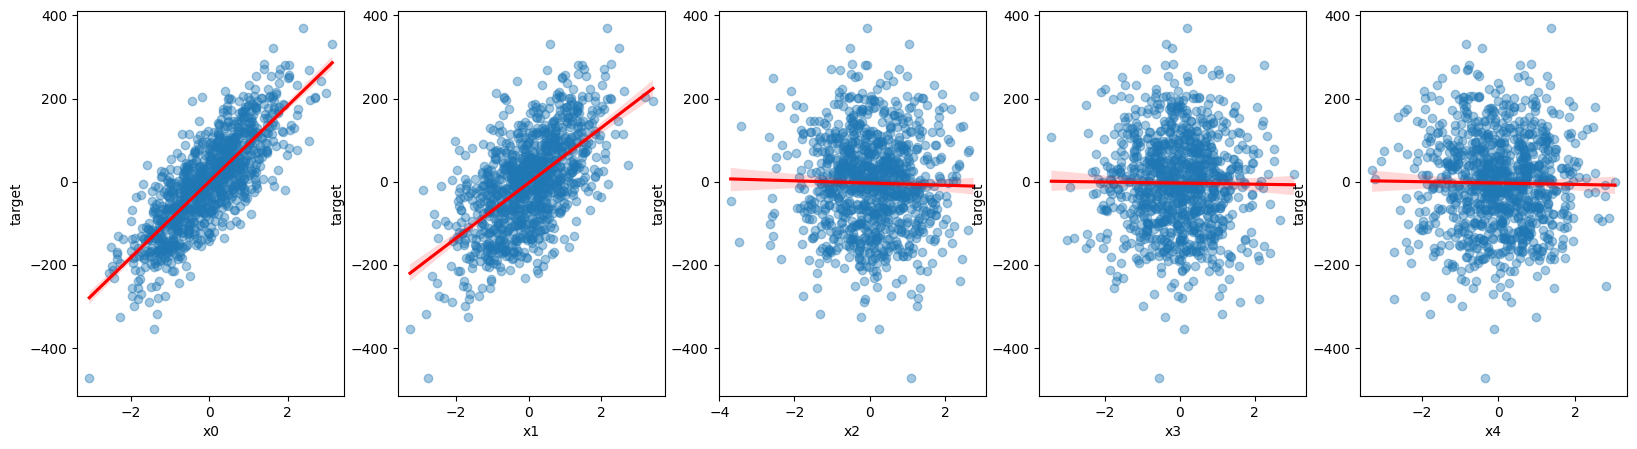

In [149]:
# vamos a visualizar estas variables
# creamos una figura de matplotlib que contenga 5 subplots, uno por cada feature:

fig, axes = plt.subplots(1, 5, figsize=(20, 5))

# Creamos un loop para iterar sobre cada feature y graficar la regresión lineal entre cada feature y el target:

for i, feature in enumerate(data.columns[:-1]):
    sns.regplot(x=feature,
                y='target',
                data=data,
                ax=axes[i],
                scatter_kws={'alpha': 0.4},
                line_kws={'color': 'red'},
                ci=95)

Ahora agregamos _outliers_ a un nuevo dataset

In [150]:
data = generate_dataset(
    n_samples=1000,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=0,
    output='dataframe'
)

In [151]:
do1 = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.01,
    extreme_outliers=False,
    only_tails=False,
)
do2 = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.01,
    extreme_outliers=False,
    only_tails=True,
    two_tailed=True,
)
do3 = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.01,
    extreme_outliers=False,
    only_tails=True,
    two_tailed=False,
)

Text(0.5, 1.0, 'Outliers (one-tailed)')

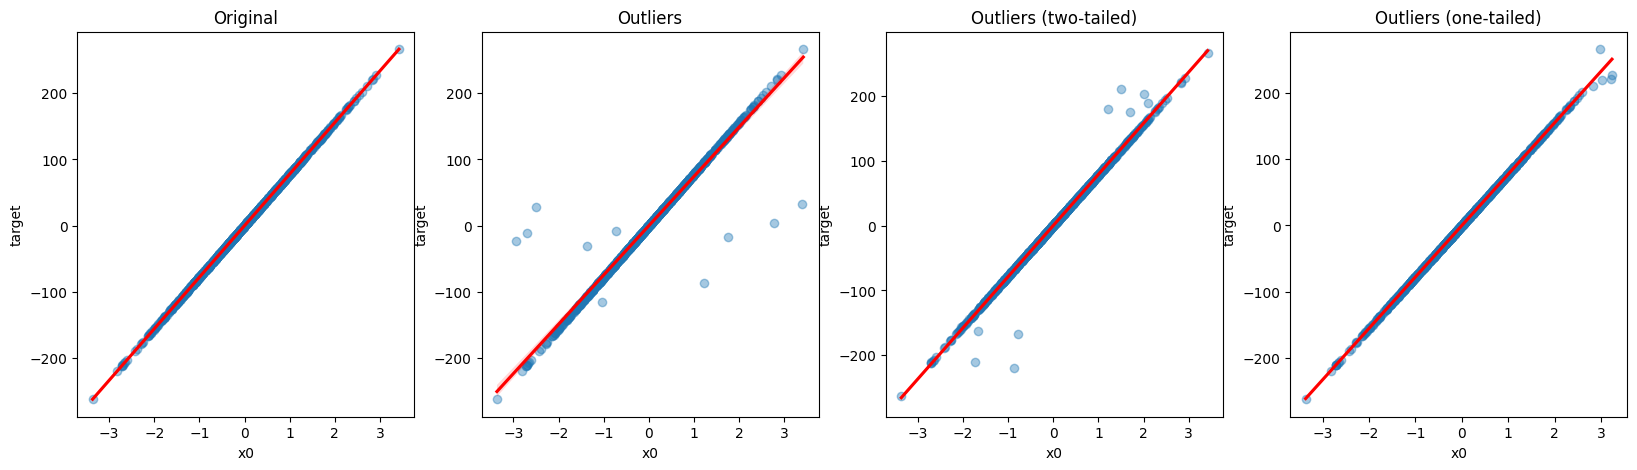

In [152]:
# vamos a visualizar estas los distintos datasets

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

sns.regplot(x='x0',
            y='target',
            data=data,
            ax=axes[0],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[0].set_title('Original')

sns.regplot(x='x0',
            y='target',
            data=do1,
            ax=axes[1],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[1].set_title('Outliers')

sns.regplot(x='x0',
            y='target',
            data=do2,
            ax=axes[2],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[2].set_title('Outliers (two-tailed)')

sns.regplot(x='x0',
            y='target',
            data=do3,
            ax=axes[3],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[3].set_title('Outliers (one-tailed)')

Text(0.5, 1.0, 'Outliers')

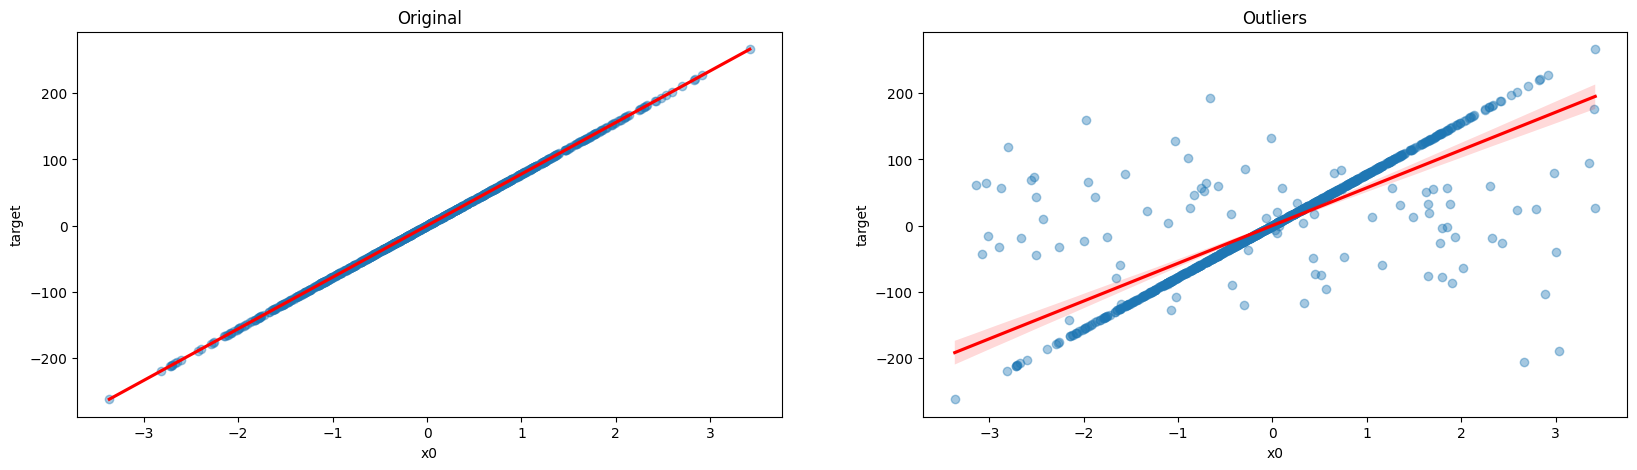

In [153]:
# y si lo queremos con mucho mas outliers?

doe = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.1,
    extreme_outliers=True)

# vamos a visualizar este caso

fig, axes = plt.subplots(1, 2, figsize=(20, 5))

sns.regplot(x='x0',
            y='target',
            data=data,
            ax=axes[0],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[0].set_title('Original')

sns.regplot(x='x0',
            y='target',
            data=doe,
            ax=axes[1],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[1].set_title('Outliers')

### Ejercicio 4

Utilizando la funcion `generate_data` generar un problema de regresión multivariada en el cual cuente con N variables informativas y M variables no informativas.

Ejemplo:
```python
data = generate_dataset(n_samples=1000,
                    n_features=10,
                    n_informative=5,
                    n_targets=1,
                    noise=20.0,
                    random_state=42,
                    output='dataframe')

```

Dado un valor de _noise_ fijo, sin fijar _random_state_ (para poder asegurarnos
que los datos que generamos son distintos) realizaremos 100 simulaciones de este dataset.

En la simulación deberemos generar el dataset, hacer una división de train-test, ajustar
un modelo de regresión lineal multivariada y validar el mismo.

En cada iteración de esta simulación debemos guardar:

- Los coeficientes de la regresión.
- El RMSE de train y test.
- El MAE de train y test. 


> Qué pasa con los coeficientes de las variables no informativas? La regresión se ve afectada por estas variables?
> ***HINT:*** Utilice las distribuciones de los coeficientes para analizar y test de hipótesis para sacar conclusiones.

In [154]:
import numpy as np
from tqdm import tqdm

In [155]:
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

#### Ejemplo para un solo conjunto de datos

In [164]:
data = generate_dataset(
    n_samples=10000,
    n_features=10,
    n_informative=3,
    n_targets=1,
    noise=15,
    bias=10,
    output='dataframe'
)

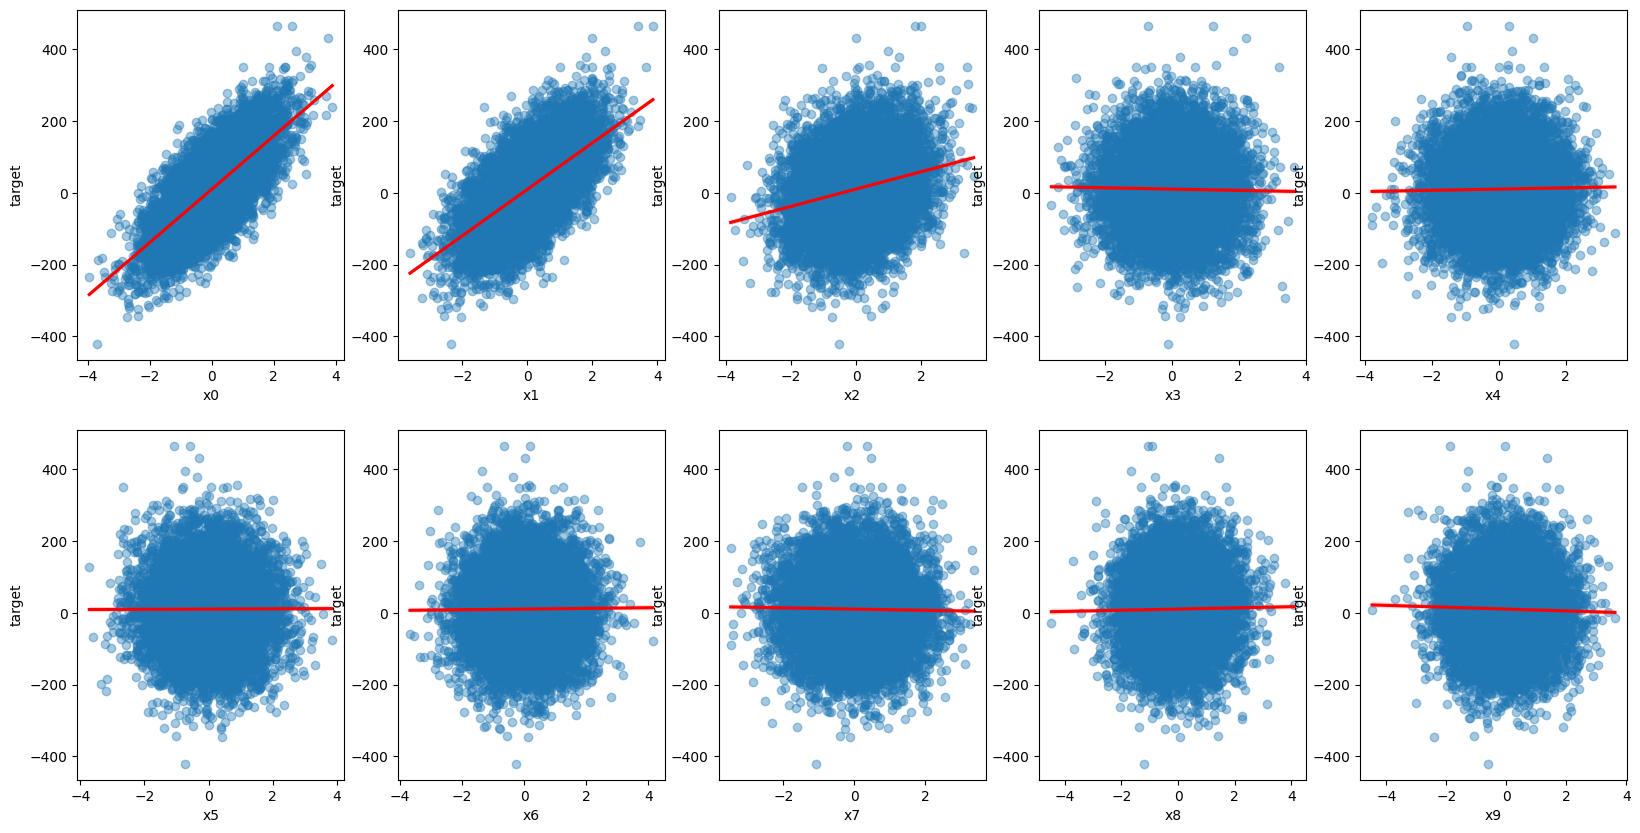

In [165]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))

for i, feature in enumerate(data.columns[:-1]):
    sns.regplot(x=feature,
                y='target',
                data=data,
                ax=axes[i // 5, i % 5],  # Usamos integer division y el residuo para obtener las coordenadas correctas del subplot
                scatter_kws={'alpha': 0.4},
                line_kws={'color': 'red'},
                ci=95)

plt.show()

In [166]:
# Dividir datos
X = np.column_stack((np.ones(data.shape[0]), np.array(data.drop('target', axis=1).values)))
y = np.array(data['target'])

X_train, _, X_test, y_train, _, y_test = data_split(
    X, y, val_size=0, test_size=0.2, shuffle=True)
print("X_train: {} | X_test: {} | y_train: {} | y_test: {}".format(
    X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X_train: (8000, 11) | X_test: (2000, 11) | y_train: (8000,) | y_test: (2000,)


In [167]:
# Ajustar regresion lineal
betas = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)

# Predecir en train y test
y_train_pred = X_train.dot(betas)
y_test_pred = X_test.dot(betas)

# Calcular y mostrar errores
rmse_train = rmse(y_train, y_train_pred)
rmse_test = rmse(y_test, y_test_pred)
mae_train = mae(y_train, y_train_pred)
mae_test = mae(y_test, y_test_pred)

np.set_printoptions(precision=2)
print("Coeficientes de la regresión:", betas)
print("RMSE_train: {:.2f} | RMSE_test: {:.2f}\nMAE_train: {:.2f} | MAE_test: {:.2f}".format(
    rmse_train, rmse_test, mae_train, mae_test))
np.set_printoptions(precision=None)

Coeficientes de la regresión: [ 9.82e+00  7.40e+01  6.44e+01  2.47e+01 -1.35e-01 -1.99e-01 -1.63e-01
  1.97e-01  6.38e-02  1.10e-01  6.17e-02]
RMSE_train: 14.86 | RMSE_test: 15.07
MAE_train: 11.91 | MAE_test: 11.99


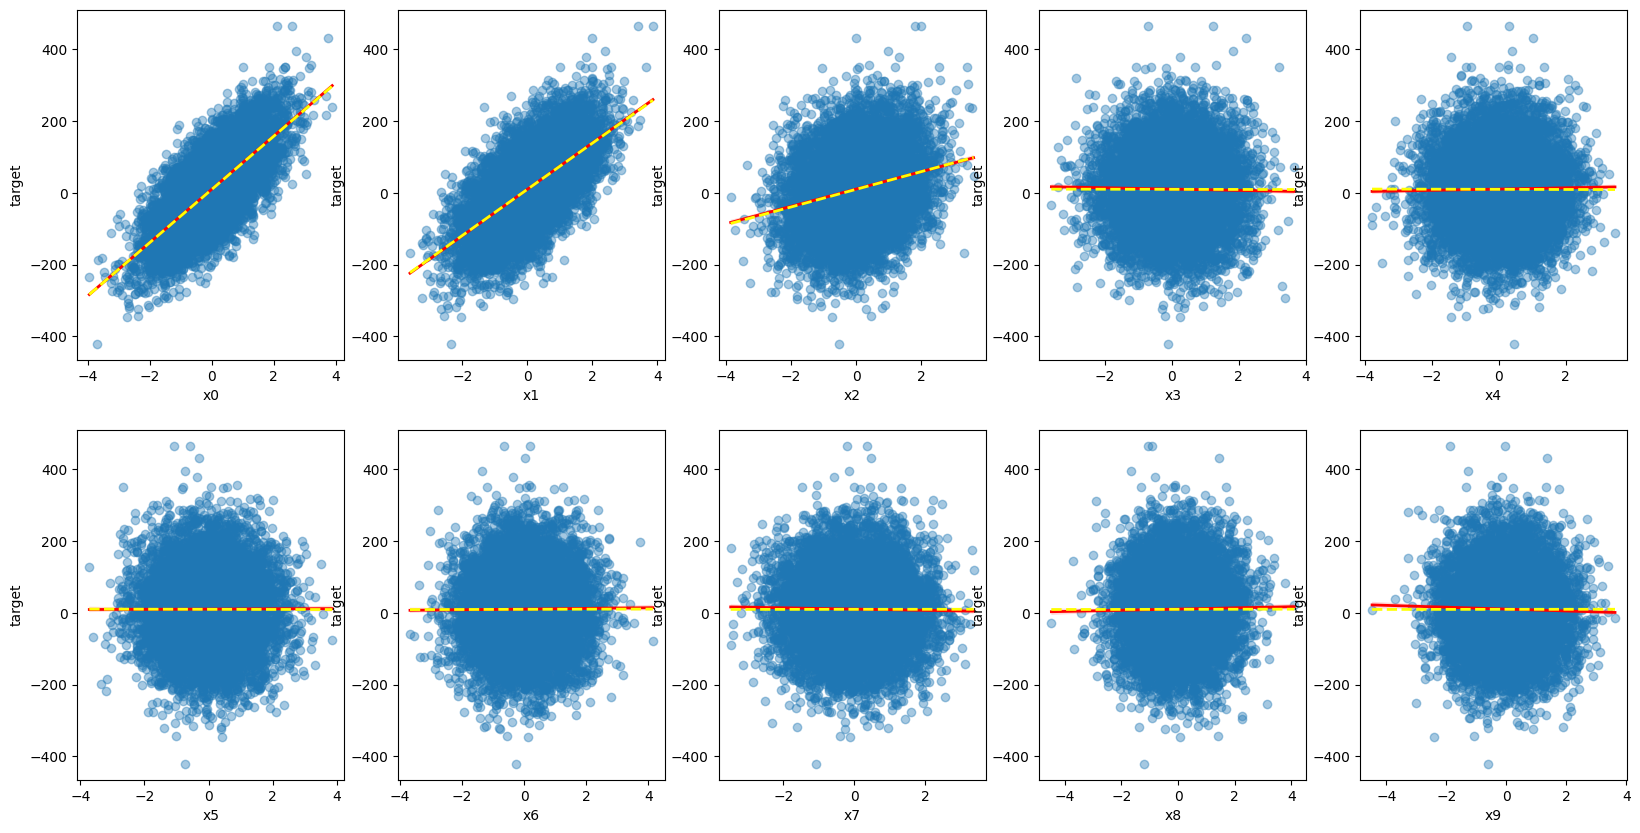

In [168]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))

for i, feature in enumerate(data.columns[:-1]):
    sns.regplot(x=feature,
                y='target',
                data=data,
                ax=axes[i // 5, i % 5],
                scatter_kws={'alpha': 0.4},
                line_kws={'color': 'red', 'linewidth': 2},
                ci=95)

    # Generar rectas de regresion
    x_line = np.linspace(data[feature].min(), data[feature].max(), 100)
    y_line = betas[0] + betas[i + 1] * x_line
    axes[i // 5, i % 5].plot(x_line, y_line, color='yellow', linestyle='dashed', linewidth=2)

plt.show()

#### Simulacion

In [161]:
# Parámetros de la simulación
n_exp = 100
n_samples = 10000
n_features = 10
n_informative = 3
n_targets = 1
noise=[15]  # noise = np.linspace(0, 100, 100)
bias=[10] # bias = np.linspace(0, 100, 20)

In [162]:
betas_output = []
rmse_train_output = []
rmse_test_output = []
mae_train_output = []
mae_test_output = []

# Esqueleto de la simulación
for _ in tqdm(range(n_exp)):
    for b in bias:
        for n in noise:
            data = generate_dataset(
                n_samples=n_samples,
                n_features=n_features,
                n_informative=n_informative,
                n_targets=n_targets,
                noise=n,
                bias=b,
                output='dataframe'
            )

            # Dividir datos
            X = np.column_stack((np.ones(data.shape[0]), np.array(
                data.drop('target', axis=1).values)))
            y = np.array(data['target'])
            X_train, _, X_test, y_train, _, y_test = data_split(
                X, y, val_size=0, test_size=0.2, shuffle=True)

            # Ajustar regresion lineal
            betas = np.linalg.inv(X_train.T.dot(X_train)).dot(
                X_train.T).dot(y_train)

            # Predecir en train y test
            y_train_pred = X_train.dot(betas)
            y_test_pred = X_test.dot(betas)

            # Calcular y guardar resultados
            betas_output.append(betas)
            rmse_train_output.append(rmse(y_train, y_train_pred))
            rmse_test_output.append(rmse(y_test, y_test_pred))
            mae_train_output.append(mae(y_train, y_train_pred))
            mae_test_output.append(mae(y_test, y_test_pred))
            
betas_output = np.array(betas_output)
rmse_train_output = np.array(rmse_train_output)
rmse_test_output = np.array(rmse_test_output)
mae_train_output = np.array(mae_train_output)
mae_test_output = np.array(mae_test_output)

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:01<00:00, 90.26it/s]


IndexError: index 2 is out of bounds for axis 0 with size 2

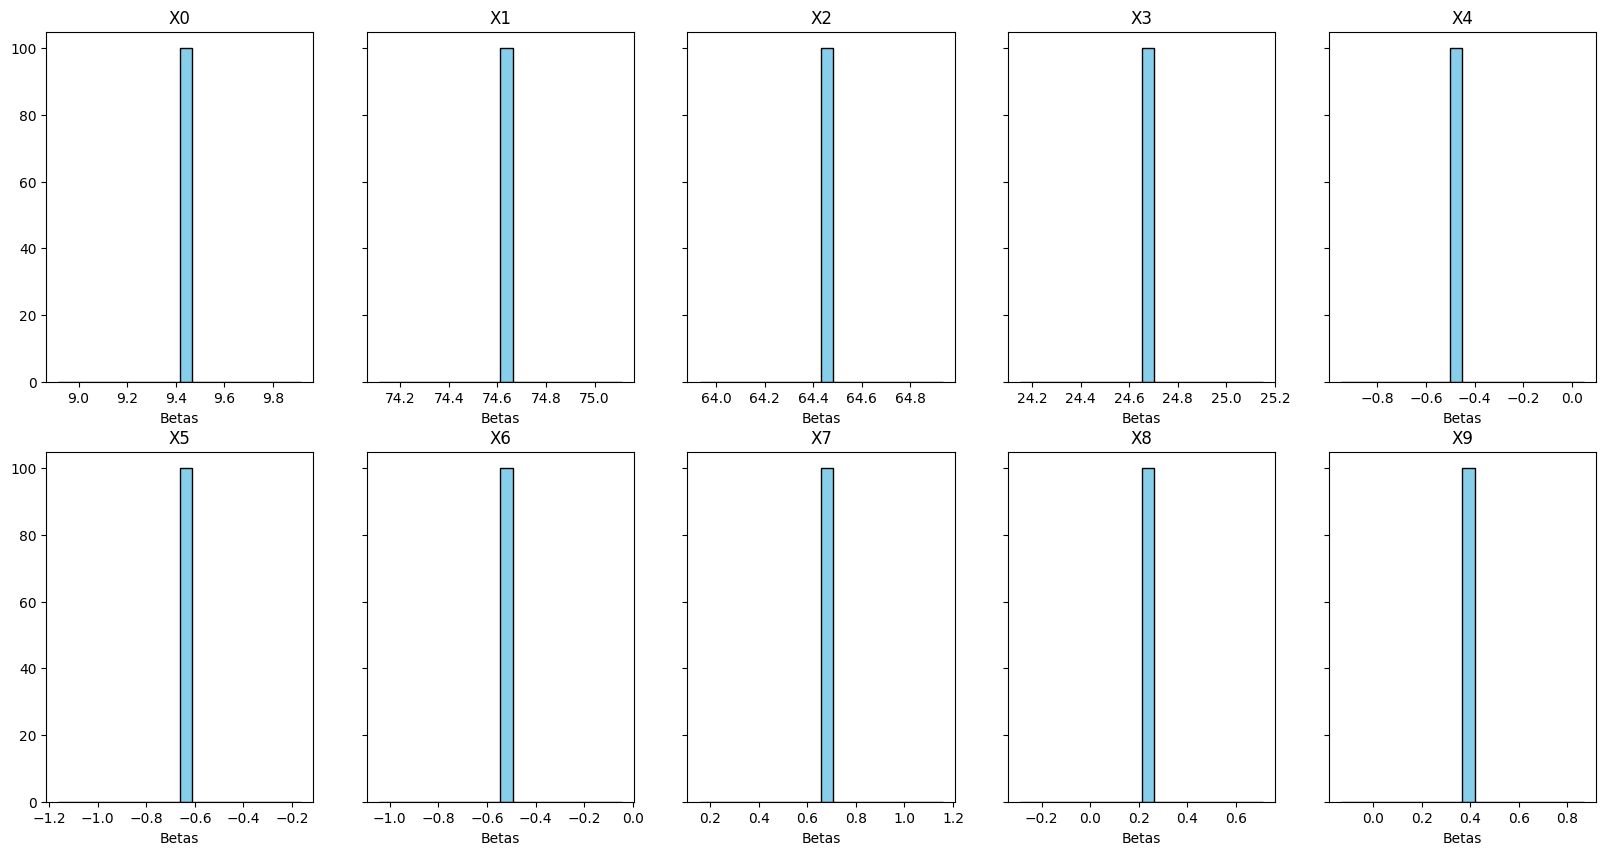

In [163]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10), sharey=True)

for i in range(11):
    row = i // 5
    col = i % 5
    axes[row, col].hist(betas_output[:, i], bins=20, color='skyblue', edgecolor='black')
    axes[row, col].set_title(f'X{i}')
    axes[row, col].set_xlabel('Betas')

plt.tight_layout()
plt.show()

### Ejercicio 5


Utilizando la funcion `generate_outliers` generar puntos extremos dentro de los datos que generamos anteriormente. En este ejercicio dejar setteado `extreme_outliers` como `False` y observe como variando el porcentaje de los mismos la regresión comienza a afectarse.

Pasos:

1. Generamos un dataset de regresion lineal simple (1 feature y 1 target value) con `noise` fijo en 0.5.
2. Generamos outliers fijando `extreme_outliers`.
2. Probar los distintos regresores a ver como se comportan frente a estos datasets anómalos.
3. Simular con multiples porcentajes de outliers (desde 1% hasta 10%). Qué pasa con los modelos?

Los modelos a utilizar en este problema son:

    - Regresion Lineal simple
    - Regresion de Huber
    - Regresión Ridge

In [212]:
from sklearn.linear_model import LinearRegression, HuberRegressor, RidgeCV

#### Ejemplo para un solo conjunto de datos

In [200]:
data = generate_dataset(
    n_samples=10000,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=.5,
    bias=10,
    output='dataframe'
)

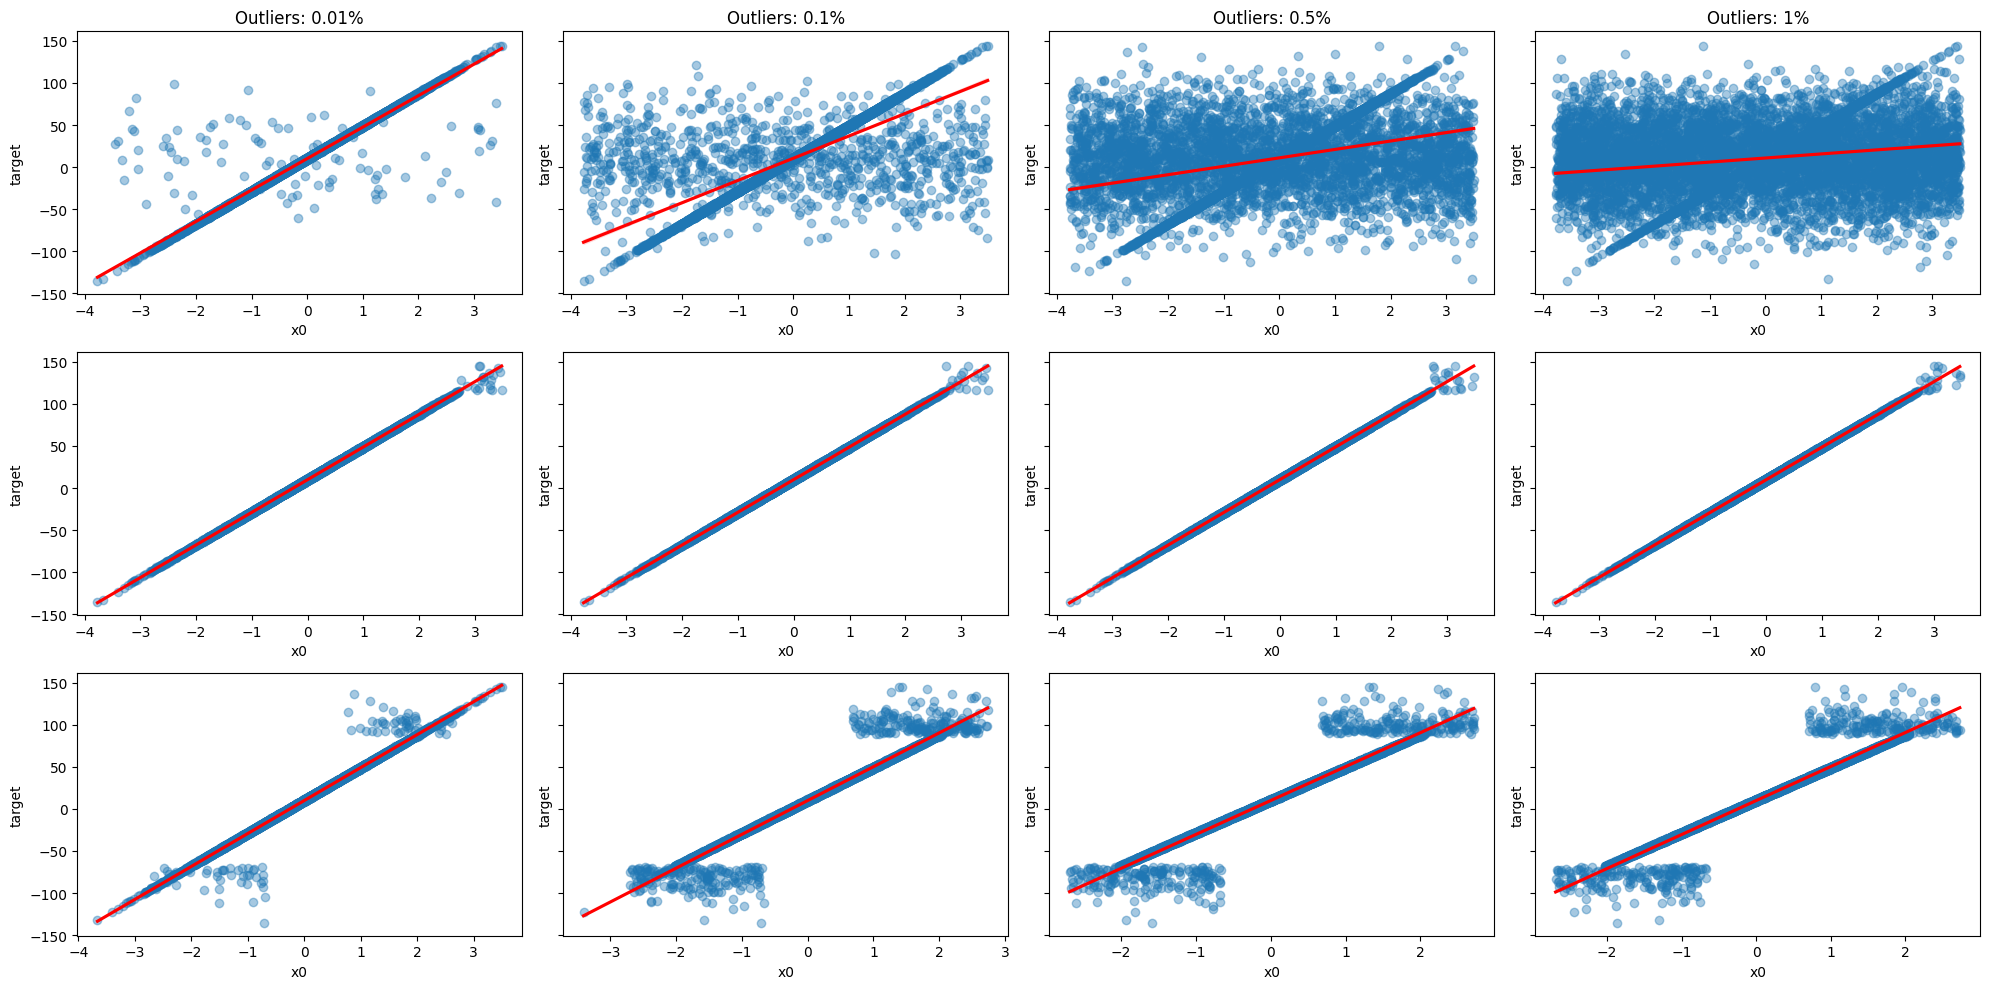

In [217]:
outliers_percentage_list = [.01,.1,.5,1]
only_tails_list = [False, True, True]
two_tailed_list = [False, False, True]

fig, axes = plt.subplots(len(only_tails_list), len(outliers_percentage_list), figsize=(20, 10), sharey=True)
for i in range(len(only_tails_list)):
    for j, outliers_percentage in enumerate(outliers_percentage_list):
        data_outliers = generate_outliers(
            df=data,
            columns=None,
            percentage=outliers_percentage,
            extreme_outliers=False,
            only_tails=only_tails_list[i],
            two_tailed=two_tailed_list[i],
        )
        sns.regplot(
            x='x0',
            y='target',
            data=data_outliers,
            ax=axes[i,j],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95
        )

for j, outliers_percentage in enumerate(outliers_percentage_list):
    axes[0, j].set_title(f'Outliers: {outliers_percentage}%')
plt.tight_layout()
plt.show()

In [219]:
data_outliers = generate_outliers(
    df=data,
    columns=None,
    percentage=.1,
    extreme_outliers=False,
    only_tails=False
)

In [220]:
# Dividir datos
X = np.column_stack((np.ones(data_outliers.shape[0]), np.array(data_outliers.drop('target', axis=1).values)))
y = np.array(data_outliers['target'])

X_train, _, X_test, y_train, _, y_test = data_split(
    X, y, val_size=0, test_size=0.2, shuffle=True)
print("X_train: {} | X_test: {} | y_train: {} | y_test: {}".format(
    X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X_train: (8000, 2) | X_test: (2000, 2) | y_train: (8000,) | y_test: (2000,)


In [221]:
# Regresión Lineal Simple
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Regresión de Huber
huber_model = HuberRegressor()
huber_model.fit(X_train, y_train)

# Regresión Ridge
ridge_model = RidgeCV()
ridge_model.fit(X_train, y_train)

RidgeCV()

In [222]:
y_pred_linear = linear_model.predict(X_test)
y_pred_huber = huber_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)

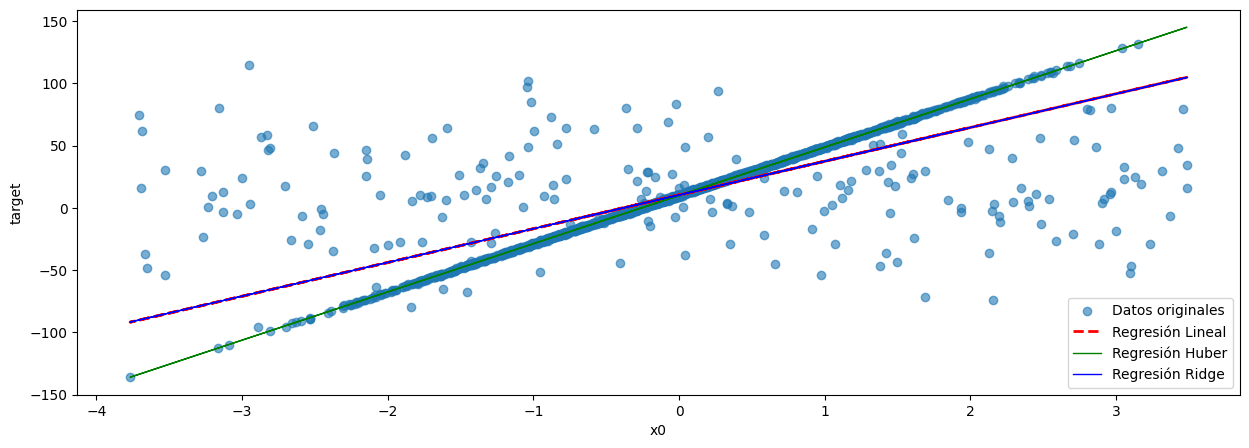

In [232]:
predictions_df = pd.DataFrame({'Actual': y_test,
                               'Linear': y_pred_linear,
                               'Huber': y_pred_huber,
                               'Ridge': y_pred_ridge})

plt.figure(figsize=(15, 5))
plt.scatter(X_test[:, 1], y_test, label='Datos originales', alpha=0.6)
plt.plot(X_test[:, 1], y_pred_linear, label='Regresión Lineal', color='red', linestyle='dashed', linewidth=2)
plt.plot(X_test[:, 1], y_pred_huber, label='Regresión Huber', color='green', linewidth=1)
plt.plot(X_test[:, 1], y_pred_ridge, label='Regresión Ridge', color='blue', linewidth=1)
plt.xlabel('x0')
plt.ylabel('target')
plt.legend()
plt.show()

### Simulacion

#### Ejemplo para un solo conjunto de datos

## Problema de Clasificación

### Ejercicio 6

En este ejercicio vamos a jugar un poco con descenso de gradiente. Para esto consideremos lo visto en clase que es el problema de regresión.

Como paso inicial, vamos a sacarnos de encima la parte teórica. Recordemos que partimos del siguiente modelo

$$
y = \beta_0 + \beta_1 \cdot x
$$

En este caso nuestra función objetivo a optimizar será:

$$
MSE = ||y-\hat{y}||^2
$$


Para calcular el gradiente de la función de error cuadrático medio (MSE) con respecto a los parámetros $\beta_0$ y $\beta_1$, es útil primero expresar la función de coste de forma más explicita. Dado que $\hat{y} = \beta_0 + \beta_1 \cdot x$, podemos reescribir la función MSE como sigue:

$$
MSE(\beta_0, \beta_1) = \frac{1}{N} \sum_{i=1}^{N} (y_i - \beta_0 - \beta_1 \cdot x_i)^2
$$

Aquí, $N$ es el número de observaciones en el conjunto de datos y $y_i$ y $x_i$ son el valor observado y el valor de la característica correspondiente para la i-ésima observación.

El gradiente de la función de coste está compuesto por las derivadas parciales de la función de coste con respecto a cada uno de los parámetros. Así, el gradiente es un vector de la forma:

$$
\nabla MSE(\beta_0, \beta_1) = \left[ \frac{\partial MSE}{\partial \beta_0}, \frac{\partial MSE}{\partial \beta_1} \right]
$$

Las derivadas parciales se pueden calcular como sigue:

$$
\frac{\partial MSE}{\partial \beta_0} = \frac{-2}{N} \sum_{i=1}^{N} (y_i - \beta_0 - \beta_1 \cdot x_i)
$$

$$
\frac{\partial MSE}{\partial \beta_1} = \frac{-2}{N} \sum_{i=1}^{N} x_i \cdot (y_i - \beta_0 - \beta_1 \cdot x_i)
$$

Así que finalmente tenemos:

$$
\nabla MSE(\beta_0, \beta_1) = \left[ \frac{-2}{N} \sum_{i=1}^{N} (y_i - \beta_0 - \beta_1 \cdot x_i), \frac{-2}{N} \sum_{i=1}^{N} x_i \cdot (y_i - \beta_0 - \beta_1 \cdot x_i) \right]
$$

El cálculo del gradiente se usa en el descenso de gradiente para actualizar los parámetros $\beta_0$ y $\beta_1$ en cada iteración, en dirección opuesta al gradiente, para minimizar la función de coste.

Estos cálculos se pueden implementar en código Python de la siguiente manera:

```python
def gradient(X, y, beta0, beta1):
    N = len(y)
    y_hat = beta0 + beta1 * X

    d_beta0 = (-2/N) * np.sum(y - y_hat)
    d_beta1 = (-2/N) * np.sum(X * (y - y_hat))

    return d_beta0, d_beta1
```

Ahora, si quisieramos realizar esto de manera matricial, podemos hacer lo siguiente:

Primero, necesitamos cambiar la representación de nuestros datos. Podemos agregar un vector de unos a nuestra matriz de características para representar el término de intersección $\beta_0$. De esta manera, $X$ toma esta forma:

$$
X = \begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_N \\
\end{bmatrix}
$$

Y nuestro vector de parámetros $\theta$ se verá así:

$$
\theta = \begin{bmatrix}
\beta_0 \\
\beta_1 \\
\end{bmatrix}
$$

Entonces, nuestra predicción $\hat{y}$ se calcula como $X\theta$:

$$
\hat{y} = X\theta = \begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_N \\
\end{bmatrix} \cdot \begin{bmatrix}
\beta_0 \\
\beta_1 \\
\end{bmatrix}
$$

Nuestra función de coste MSE se ve de la siguiente manera en forma matricial:

$$
MSE(\theta) = \frac{1}{N} (y - X\theta)^T (y - X\theta)
$$

Las derivadas parciales de esta función de coste con respecto a los parámetros se pueden calcular de la siguiente manera:

$$
\frac{\partial MSE}{\partial \theta} = \frac{-2}{N} X^T (y - X\theta)
$$


Esto se puede implementar en Python de la siguiente manera:

In [233]:
def gradient(X: np.ndarray, y: np.ndarray, theta: np.ndarray) -> np.ndarray:
    """
    Esta función calcula el gradiente de la función de coste del error cuadrático medio (MSE)
    para una regresión lineal simple. La función toma como entrada la matriz de características X,
    el vector de observaciones y y el vector de parámetros theta, y devuelve el gradiente, que
    es un vector de las mismas dimensiones que theta.

    Params:
    X : numpy.ndarray
        La matriz de características extendida que incluye un vector de unos. De tamaño (N, d),
        donde N es el número de observaciones y d es el número de características (incluyendo el
        término de intersección).

    y : numpy.ndarray
        El vector de observaciones. De tamaño (N,), donde N es el número de observaciones.

    theta : numpy.ndarray
        El vector de parámetros. De tamaño (d,), donde d es el número de características
        (incluyendo el término de intersección).

    Returns:
    grad : numpy.ndarray
        El gradiente de la función de coste. Un vector de las mismas dimensiones que theta.

    Examples:
    >>> X = np.array([[1, 1], [1, 2], [1, 3]])
    >>> y = np.array([2, 3, 4])
    >>> theta = np.array([0, 0])
    >>> gradient(X, y, theta)
    array([-4., -8.])
    """
    N = len(y)
    y_hat = X.dot(theta)

    grad = (-2 / N) * X.T.dot(y - y_hat)

    return grad


Aquí, `X` es la matriz de características extendida que incluye un vector de unos, `y` es el vector de observaciones, y `theta` es el vector de parámetros. La función devuelve el gradiente, que es un vector de las mismas dimensiones que `theta`.

#### Gradiente Descendente

Ahora que sabemos calcular el gradiente, vamos a:

1. Crear una función _GD_ que compute el gradiente descendente. Debe tener condición de frenado
por nr de épocas pero también por tolerancia.
2. Generamos un dataset (con _generate_dataset_ de los ejercicios anteriores, utilizando un bias conocido y solo 1 feature)
3. Inicializamos un vector $(\beta_0, \beta_1)$ al azar.
4. Tratamos de calcular los mejores parámetros con el algoritmo.
5. Guardamos la función de perdida en train y test en cada época.

         x0      target
0  1.615994  343.878828
1  0.826029    3.163008
2  2.762525  102.066791
3 -1.553612 -152.278836
4 -0.506035  -40.512486


<Axes: xlabel='x0', ylabel='target'>

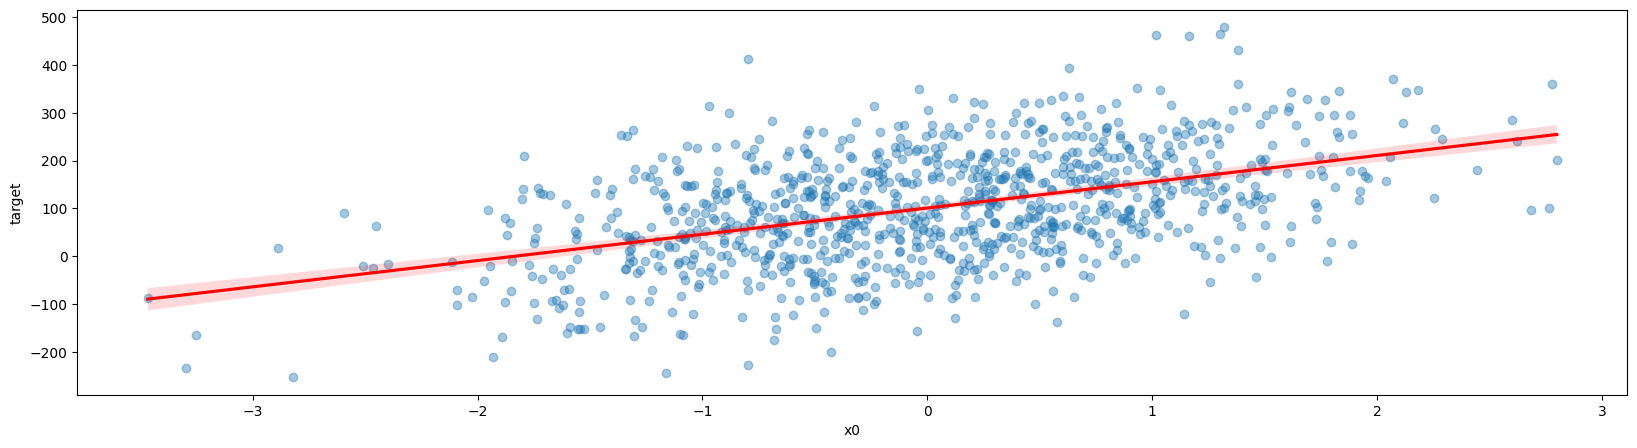

In [234]:

# Crear dataset
data = generate_dataset(
    n_samples=1000,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=100,
    bias=100,
    output='dataframe'
)

print(data.head())

fig, axes = plt.subplots(1, 1, figsize=(20, 5))

sns.regplot(x=data['x0'],
            y=data['target'],
            data=data,
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)

In [235]:
def get_mse(y, y_hat):
    return np.mean((y - y_hat) ** 2)


def GD(X_train: np.ndarray, y_train: np.ndarray, 
                     X_val: np.ndarray, y_val: np.ndarray, 
                     theta: np.ndarray, epoch: int = 100, 
                     alpha: float = 0.01, tol: float = 0.01) -> np.ndarray:
    flag_break_tol = False
    err_train = []
    err_val = []
    N = len(y_train)

    for e in range(epoch):

        # Mezclo los datos
        idx_shuffle = np.random.permutation(N)
        X_train = X_train[idx_shuffle]
        y_train = y_train[idx_shuffle]
        
        # Calculo el gradiente
        grad = gradient(X_train,y_train,theta)

        # Calculo los nuevos pesos y verifico si hay que salir por tolerancia
        theta_new = theta - alpha * grad
        if (np.all(((np.abs(theta-theta_new))/theta) < tol)):
            flag_break_tol = True

        # Actualizo los pesos y calculo prediccion y error
        theta = theta_new
        y_hat_train = X_train.dot(theta)
        err_train.append(get_mse(y_train, y_hat_train))
        y_hat_val = X_val.dot(theta)
        err_val.append(get_mse(y_val, y_hat_val))

        if (flag_break_tol):
            break

    return theta, err_train, err_val

In [236]:
# Dividir datos
X = np.column_stack((np.ones(len(data['x0'])), data['x0']))
y = np.array(data['target'])

X_train, X_val, _, y_train, y_val, _ = data_split(
    X, y, val_size=0.2, test_size=0, shuffle=True)
print("X_train: {} | X_val: {} | y_train: {} | y_val: {}".format(
    X_train.shape, X_val.shape, y_train.shape, y_val.shape))

X_train: (800, 2) | X_val: (200, 2) | y_train: (800,) | y_val: (200,)


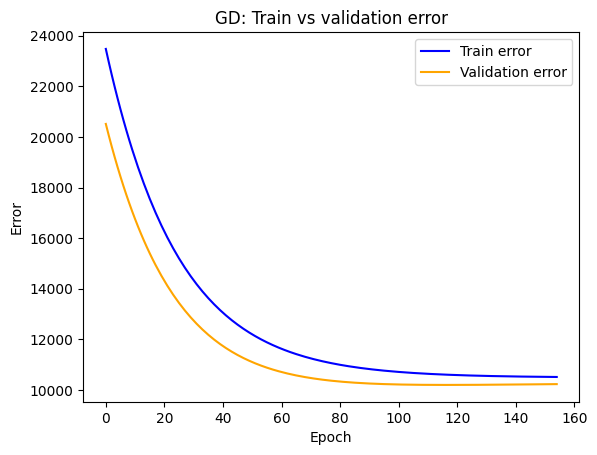

In [237]:
# Hiperparametros
alpha = 0.01
epoch = 500
tol = 0.001

# Inicializacion
theta = np.random.rand(2)

# Obtener parametros
theta, err_train, err_val = GD(
    X_train, y_train, X_val, y_val, theta, alpha=alpha, epoch=epoch, tol=tol)


plt.plot(err_train, color='blue', label="Train error")
plt.plot(err_val, color='orange', label="Validation error")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.title("GD: Train vs validation error")
plt.legend()
plt.show()

#### Gradiente Descendente Estocástico

Ahora que sabemos calcular el gradiente, vamos a:

1. Crear una función _SGD_ que compute el gradiente descendente estocástico.
2. Generamos un dataset (con _generate_dataset_ de los ejercicios anteriores, utilizando un bias conocido y solo 1 feature)
3. Inicializamos un vector $(\beta_0, \beta_1)$ al azar.
4. Tratamos de calcular los mejores parámetros con el algoritmo.
5. Guardamos la función de perdida en train y test en cada época.

In [238]:
def SGD(X_train: np.ndarray, y_train: np.ndarray, 
                     X_val: np.ndarray, y_val: np.ndarray, 
                     theta: np.ndarray, epoch: int = 100, 
                     alpha: float = 0.01, tol: float = 0.01) -> np.ndarray:
    flag_break_tol = False
    err_train = []
    err_val = []
    N = len(y_train)

    for e in range(epoch):
        
        # Mezclo los datos
        idx_shuffle = np.random.permutation(N)
        X_train = X_train[idx_shuffle]
        y_train = y_train[idx_shuffle]
        
        theta_old = theta
        for (x,y) in zip(X_train,y_train):
            
            # Calculo prediccion, error y gradiente
            y_hat = x.dot(theta)
            err_sample = y - y_hat
            grad = (-2 / N) * x.T.dot(err_sample)
            
            # Acutalizo pesos
            theta = theta - alpha * grad
            
        if (np.all(((np.abs(theta_old-theta))/theta) < tol)):
            flag_break_tol = True
        theta_old = theta

        y_hat_train = X_train.dot(theta)
        err_train.append(get_mse(y_train, y_hat_train))
        y_hat_val = X_val.dot(theta)
        err_val.append(get_mse(y_val, y_hat_val))

        if (flag_break_tol):
            break

    return theta, err_train, err_val

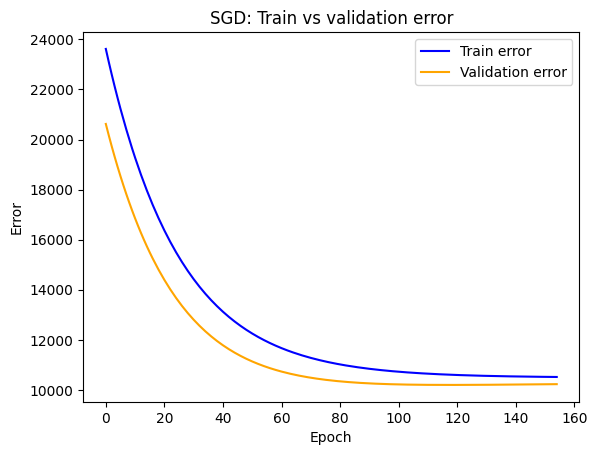

In [239]:
# Hiperparametros
alpha = 0.01
epoch = 500
tol = 0.001

# Inicializacion
theta = np.random.rand(2)

# Obtener parametros
theta, err_train, err_val = SGD(
    X_train, y_train, X_val, y_val, theta, alpha=alpha, epoch=epoch, tol=tol)


plt.plot(err_train, color='blue', label="Train error")
plt.plot(err_val, color='orange', label="Validation error")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.title("SGD: Train vs validation error")
plt.legend()
plt.show()

Analice:

1. Cómo se comportan estos algoritmos? se puede ver la diferencia entre SGD y GD?.
2. Cómo afecto el _learning rate_ a estos algoritmos? Realice una simulación del mismo cambiando el `lr`.
3. Compare en una curva de Perdida vs Epoch los dos algoritmos. Nota algo interesante?

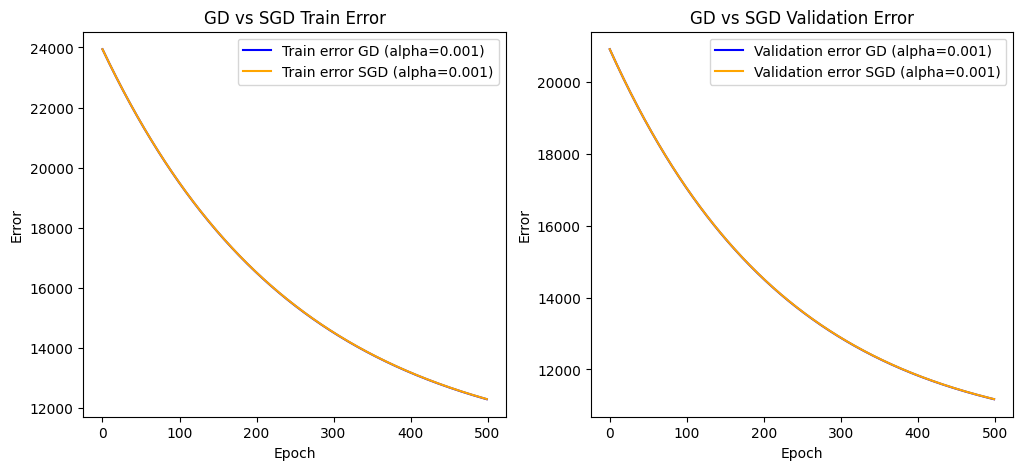

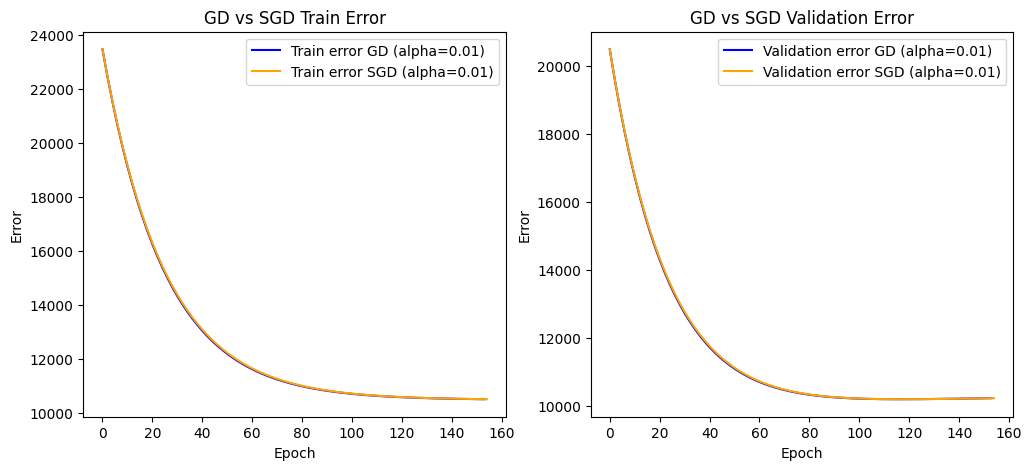

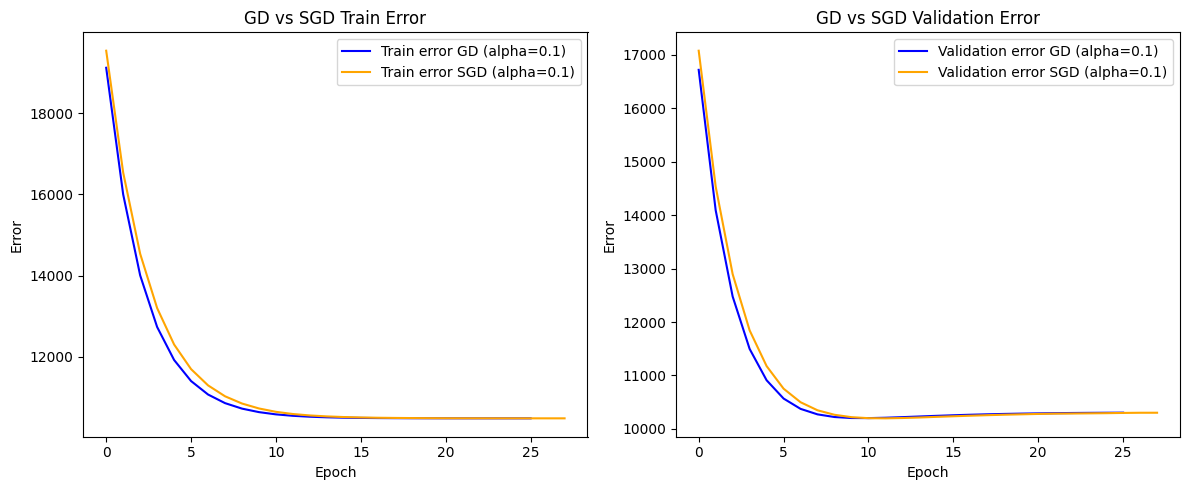

In [240]:
# Hiperparametros
epoch = 500
tol = 0.001

# Inicializacion
theta = np.random.rand(2)

for alpha in [0.001,0.01,0.1]:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    # Obtener parametros
    gd_theta, gd_err_train, gd_err_val = GD(
        X_train, y_train, X_val, y_val, theta, alpha=alpha, epoch=epoch, tol=tol)
    sgd_theta, sgd_err_train, sgd_err_val = SGD(
        X_train, y_train, X_val, y_val, theta, alpha=alpha, epoch=epoch, tol=tol)
    
    axes[0].plot(gd_err_train, color='blue', label=f"Train error GD (alpha={alpha})")
    axes[0].plot(sgd_err_train, color='orange', label=f"Train error SGD (alpha={alpha})")
    axes[0].set_xlabel("Epoch")
    axes[0].set_ylabel("Error")
    axes[0].set_title("GD vs SGD Train Error")
    axes[0].legend()

    axes[1].plot(gd_err_val, color='blue', label=f"Validation error GD (alpha={alpha})")
    axes[1].plot(sgd_err_val, color='orange', label=f"Validation error SGD (alpha={alpha})")
    axes[1].set_xlabel("Epoch")
    axes[1].set_ylabel("Error")
    axes[1].set_title("GD vs SGD Validation Error")
    axes[1].legend()

plt.tight_layout()
plt.show()


### Ejercicio 7

TBD